# Example of Running Java Classes from Python

- At this point the outputs go into the jupyter command line window due to some incompatibilities, this is not an issue if you run the python code natively

## Initialising Java

In [1]:
import jpype
import os,sys
import ast
import matplotlib.pyplot as plt

java_class_location="C:\\Users\\Nandor Verba\\Documents\\Work\\Optimisation Paper\\Fog_VisDep\\JavaDeployer\\target\\fog_deployer-0.0.1-SNAPSHOT.jar"
java_package_name = "org.nandor.fog_deployer"

deployments_folder ="C:\\Users\\Nandor Verba\\Documents\\Work\\Optimisation Paper\\Fog_VisDep\\deployments"



#If Not defined
java_path="C:\\Program Files\\Java\\jdk-15\\bin\\server\\jvm.dll"


#Class Options
cpopt="-Djava.class.path=%s" % (java_class_location)

try:
    #If defined
    jpype.startJVM(getDefaultJVMPath(),"-ea",cpopt,convertStrings=False)
except NameError :
    #If Not defined
    jpype.startJVM(java_path,"-ea",cpopt,convertStrings=False)
    

## Initialise and Save DIffrent types of Fog Deployment start Points

In [2]:
#Fog Size in Apps
fog_size = 20

#Delay Scenario
fog_init_delay = jpype.JClass(java_package_name+".Methods").InitDelayFog(fog_size)
ret_json = jpype.JClass(java_package_name+".Exporter").writeJsonFog(fog_init_delay)
print("Initialised Fog Environment with Delay minimisation scenario:\n",fog_init_delay,"\n")
with open(os.path.join(deployments_folder,"init_delay_fog_size"+str(fog_size)+".json"), "w") as text_file:
    text_file.write(str(ret_json))

#multi_parameter Scenario
fog_init_multi = jpype.JClass(java_package_name+".Methods").InitMultiFog(fog_size)
ret_json = jpype.JClass(java_package_name+".Exporter").writeJsonFog(fog_init_multi)
print("Initialised Fog Environment with Multi-Objective scenario:\n",fog_init_multi,"\n")
with open(os.path.join(deployments_folder,"init_multi_fog_size"+str(fog_size)+".json"), "w") as text_file:
    text_file.write(str(ret_json))
    
#constraint and multi Scenario   
fog_init_const = jpype.JClass(java_package_name+".Methods").InitReqFog(fog_size)
ret_json = jpype.JClass(java_package_name+".Exporter").writeJsonFog(fog_init_const)
print("Initialised Fog Environment with Multi-Objective and Constraints scenario:\n",fog_init_const,"\n")
with open(os.path.join(deployments_folder,"init_constraint_fog_size"+str(fog_size)+".json"), "w") as text_file:
    text_file.write(str(ret_json))

Initialised Fog Environment with Delay minimisation scenario:
 Name: Delay Fog; Clusters:[1, 2, 3, 4]; Gateways:[1, 2, 3, 4, 5, 6, 7]; Apps:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]; Resources:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48] 

Initialised Fog Environment with Multi-Objective scenario:
 Name: Multi Fog; Clusters:[5, 6, 7]; Gateways:[1, 2, 3, 4, 5, 6, 7]; Apps:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]; Resources:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37] 

Initialised Fog Environment with Multi-Objective and Constraints scenario:
 Name: Requirement Fog; Clusters:[8, 9, 10]; Gateways:[1, 2, 3, 4, 5, 6, 7]; Apps:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]; Re

## Scenario deployment and optimsiation

Scenario types:
- 1 - GA
- 2 - Distance Clustering (No Weights)
- 3 - Sample Based Distance Clustering 
- 4 - Initial Weights based Distance Clustering
- 5 - Random Deployments 

In [3]:
fog_size = 40	

##Init Fog 
#multi_parameter Scenario
fog_init_multi = jpype.JClass(java_package_name+".Methods").InitMultiFog(fog_size)
fog_json = jpype.JClass(java_package_name+".Exporter").writeJsonFog(fog_init_multi).toJSONString();
print("Initialised Fog Environment with Multi-Objective scenario:\n",fog_init_multi,"\n")
with open(os.path.join(deployments_folder,"opt_init_multi_fog_size"+str(fog_size)+".json"), "w") as text_file:
    text_file.write(str(fog_json))
print("Starting Utility: ",fog_init_multi.getFogCompoundUtility())

dict_types = {"GA":1,"DistClust":2,"SampleClust":3,"InitWeight":4,"Random":5}

for d_type in dict_types:

    optimised_depl = jpype.JClass(java_package_name+".Main").getSampleDeployments(str(fog_json),dict_types[d_type]) #Fog Json, Optimisation Type
    ret_json = jpype.JClass(java_package_name+".Exporter").writeJsonFog(optimised_depl).toJSONString();
    with open(os.path.join(deployments_folder,"opt_"+d_type+"_multi_fog_size"+str(fog_size)+".json"), "w") as text_file:
        text_file.write(str(ret_json))

    print(d_type+" Utility: ",optimised_depl.getFogCompoundUtility())


Initialised Fog Environment with Multi-Objective scenario:
 Name: Multi Fog; Clusters:[16, 17, 18, 11, 12, 13, 14, 15]; Gateways:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]; Apps:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]; Resources:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87] 

Starting Utility:  25.282289505004883
GA Utility:  39.82333755493164
DistClust Utility:  40.58885192871094
SampleClust Utility:  30.955366134643555
InitWeight Utility:  32.56494140625
Random Utility:  37.757904052734375


## Performance Analysis

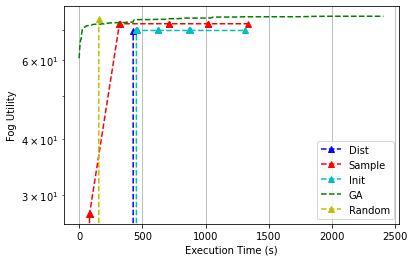

In [4]:
size =1; #0-20;1-80;2-320;
sceType = 2; #Scenario Type 1-Delay 2-Multi 3-Capab
meType = 0; #MethodType //0Everything//1Ga//2Dist//3Samp//4Ini//5Random

perf_analysis_res = jpype.JClass(java_package_name+".Methods").PerformanceAnalysis(size,sceType,meType).toJSONString()
#print(perf_analysis_res)

json_resp = ast.literal_eval("["+str(perf_analysis_res)+"]")

types = {"Dist":"--^b", "Sample":"--^r","Init":"--^c","GA":"--g","Random":"--^y" }
for t in types:
    if t+'_execTime' in json_resp[0]:
        plt.plot(json_resp[0][t+'_execTime'],json_resp[0][t+'_utility'],types[t],label = t)
plt.ylabel('Fog Utility')
plt.xlabel('Execution Time (s)')
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()

## Stopping Kernel

In [5]:
jpype.shutdownJVM()